In this project we’ll use the size of points to indicate the `area` and `populations` of **California cities**. We would like a **legend** that specifies the scale of the sizes of the points, and we’ll accomplish this by plotting some labeled data with no entries.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
cities = pd.read_csv("california_cities.csv")
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [27]:
# extracting the data we ar interested in
latitude, longitude = cities["latd"], cities["longd"]
population, area = cities["population_total"], cities["area_total_km2"]

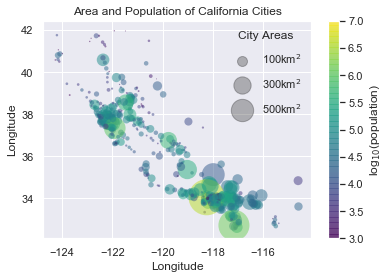

In [28]:
sns.set()
plt.scatter(longitude, latitude, label=None, c=np.log10(population),
            cmap='viridis', s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('Longitude')
plt.ylabel('Longitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# now we will craete a legend, we will plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + 'km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Areas')
plt.title("Area and Population of California Cities")
plt.show()